# **# # Exploratory Data Analysis (EDA)**
**DATASET : heart_disease**\
\
\
**1.Describe the contents of the dataset.**




In [48]:
import numpy as np
import pandas as pd

In [49]:
df = pd.read_excel('heart_disease.xlsx',names=None)
df.head()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholestoral,Target
0,63,1,3,145,233,1
1,37,1,2,130,250,1
2,41,0,1,130,204,1
3,56,1,1,120,236,1
4,57,0,0,120,354,1


The dataset is about some patient's heart disease depending on the features Age, Sex, Chest Pain Type, Resting Blood Pressure, and Cholesterol. If the patients have heart disease the targeted result is 1 otherwise the result is 0.







There are Six features in the dataset-


1.   Age
2.   Sex
3.   Chest Pain Type
4.   Resting Blood Pressure
5.   Cholesterol
6.   Target







In [50]:
df = pd.read_excel('heart_disease.xlsx',names=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     100 non-null    int64
 1   Sex                     100 non-null    int64
 2   Chest Pain Type         100 non-null    int64
 3   Resting Blood Pressure  100 non-null    int64
 4   Cholestoral             100 non-null    int64
 5   Target                  100 non-null    int64
dtypes: int64(6)
memory usage: 4.8 KB



There are Three Quantitative Continuous variables. All of these are numerical Integers.
1.   Age (Year)
2.   Resting Blood Pressure(mmHg)
3.   Cholestoral(mg/dl)

There are also Three Categorical Variables.Among them two are Ordinal 


1.   Chest Pain Type(0 = no, 1 = typical, 2=atypical, 3 = extreme )
2.   Target(0 = no, 1 = yes)

One is Nominal variable-


1.   Sex(1 = male, 0 = female)

All of the variables are Numeric Integers


In [51]:
df.isnull().values.any()

False

In [52]:
df.isnull().sum()

Age                       0
Sex                       0
Chest Pain Type           0
Resting Blood Pressure    0
Cholestoral               0
Target                    0
dtype: int64

There are no missing values in the dataset.


# **2. Find features and targets in the data**

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
df.head()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholestoral,Target
0,63,1,3,145,233,1
1,37,1,2,130,250,1
2,41,0,1,130,204,1
3,56,1,1,120,236,1
4,57,0,0,120,354,1


\
There is six variable in our dataset. The first one is age measures in years. The second one is sex Male or Female. The Third one is Chest pain type. If the value is 0 there is no chest pain, if the value is 1 there is typical chest pain if the value is 2 there is atypical chest pain and if the value is 3 there is extreme chest pain and increases the chance of heart disease. The Fourth one is Resting Blood Pressure. It is measured in millimeter mercury unit. The fifth one is Cholesterol measured in mg/dl. The last one is the targeted value. It is 1 if anyone has heart disease else 0.
\

                             Age       Sex  Chest Pain Type  \
Age                     1.000000 -0.186406        -0.031068   
Sex                    -0.186406  1.000000        -0.128586   
Chest Pain Type        -0.031068 -0.128586         1.000000   
Resting Blood Pressure  0.327069 -0.192667         0.187880   
Cholestoral             0.278836 -0.307994        -0.003970   
Target                 -0.216070 -0.267261         0.519615   

                        Resting Blood Pressure  Cholestoral    Target  
Age                                   0.327069     0.278836 -0.216070  
Sex                                  -0.192667    -0.307994 -0.267261  
Chest Pain Type                       0.187880    -0.003970  0.519615  
Resting Blood Pressure                1.000000     0.206799  0.101193  
Cholestoral                           0.206799     1.000000  0.032800  
Target                                0.101193     0.032800  1.000000  


<AxesSubplot:>

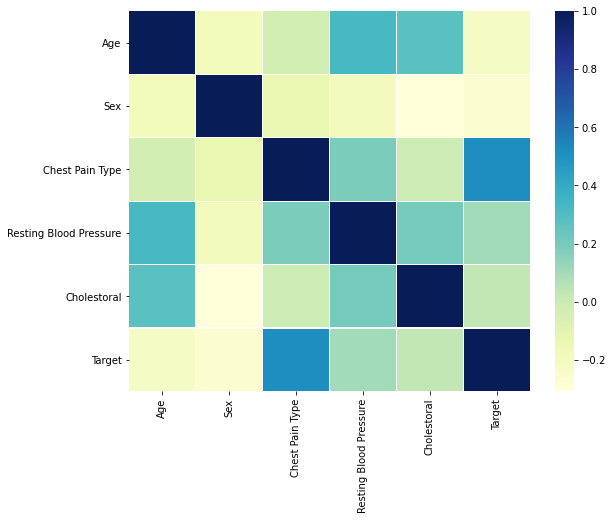

In [54]:
corrmat = df.corr()
plt.figure(figsize=(9,7))
print(corrmat)
sns.heatmap(corrmat, cmap='YlGnBu',linewidths=0.1)

\
Independent variables (also referred to as Features) are the input for a process that is being analyzes. Dependent variables are the output of the process. In this dataset our first five features called Age, Sex, Chest Pain Type, Resting Blood Pressure, Cholesterol is Independent Variables. The last Target value is the dependent variable.\
There are tendencies of increasing blood pressure and Cholesterol according to age. If Cholesterol and Blood pressure increase there is a good chance for Chest pain. Chest pain is directly related to our Target value.\
Age, Cholesterol, and Age, Resting Blood Pressure are highly correlated. Resting Blood Pressure and Cholesterol are also positively correlated with each other. Chest Pain Type is most positively correlated with the Target value. There is also a negative correlation between Sex and Cholesterol, Target, and Sex. Negative correlation also between Chest pain type with Sex and Sex with Target also seen.

# **3. Ask appropriate questions that can be answered using the available information.**

1. Find the number of patients having heart disease and the patients that haven't heart disease?
2. How many Male and Female patients have heart disease and how many haven't?
3. How many patients suffered from various types of chest Pains?
4. How many people in the age group 37-50 have heart disease?
5. How many people in the age group 50-71 have heart disease?
6. Does High blood pressure at rest correspond to heart disease?
7. Does high blood pressure correspond to high cholesterol?

In [55]:
#the number of patients having heart disease and the patients that haven't heart disease

df_target = df.groupby('Target').size()
df_target


Target
0    50
1    50
dtype: int64

In [56]:
#The number of Male and female patients have heart disease and the number that haven't

df_sex = df.groupby(['Sex','Target']).size()
df_sex

Sex  Target
0    0          8
     1         20
1    0         42
     1         30
dtype: int64

The Result can be more understandable when we visualize it.


([<matplotlib.patches.Wedge at 0x1745b09a100>,
 [Text(2.1308829575564805, 0.5471177397922209, 'Female no Heart disease'),
  Text(0.936714445170665, 1.9906195136712124, 'Female Having Heart disease'),
  Text(-2.195658797886129, 0.13813921697055853, 'Male no Heart disease'),
  Text(1.2931274883872783, -1.7798374360534195, 'Male Having Heart disease')],
 [Text(1.1622997950308074, 0.2984278580684841, '8.00%'),
  Text(0.5109351519112718, 1.0857924620024793, '20.00%'),
  Text(-1.197632071574252, 0.07534866380212284, '42.00%'),
  Text(0.7053422663930607, -0.9708204196655015, '30.00%')])

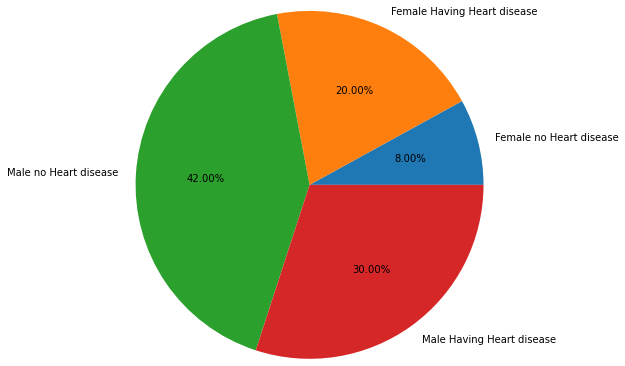

In [57]:
plt.pie(df_sex.values, labels=['Female no Heart disease','Female Having Heart disease','Male no Heart disease','Male Having Heart disease'],
        autopct='%1.2f%%' ,radius=2)

In [58]:
# Patients suffered from various types of cheast 

df_chestpain = df.groupby(['Chest Pain Type']).size()
df_chestpain

Chest Pain Type
0    47
1    13
2    33
3     7
dtype: int64

([<matplotlib.patches.Wedge at 0x1745b5e2340>,
 [Text(0.20703829750332084, 2.190236321351403, 'Chest Pain Type 0'),
  Text(-2.1470168870491393, -0.47991508282801826, 'Chest Pain Type 1'),
  Text(0.20703829750332028, -2.1902363213514033, 'Chest Pain Type 2'),
  Text(2.147016898282362, -0.47991503257346135, 'Chest Pain Type 3')],
 [Text(0.11292998045635681, 1.1946743571007652, '47.00%'),
  Text(-1.1711001202086213, -0.2617718633607372, '13.00%'),
  Text(0.11292998045635651, -1.1946743571007654, '33.00%'),
  Text(1.1711001263358338, -0.2617718359491607, '7.00%')])

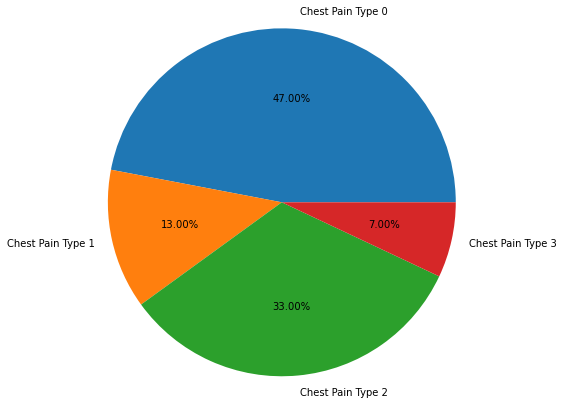

In [59]:
plt.pie(df_chestpain.values, labels=['Chest Pain Type 0','Chest Pain Type 1','Chest Pain Type 2','Chest Pain Type 3'],
        autopct='%1.2f%%' ,radius=2)

In [60]:
# People of age group 37-50 have heart disease

df_age_37_50 = pd.concat([df[(df['Age']>=37) & (df['Age']<50)][['Age','Target']].groupby(by='Target',axis=0).count()])
df_age_37_50.reset_index(inplace=True)
df_age_37_50


,Target,Age
0,0,9
1,1,17


[Text(0.5, 0, 'Result'), Text(0, 0.5, 'Number of People aged(37-50)')]

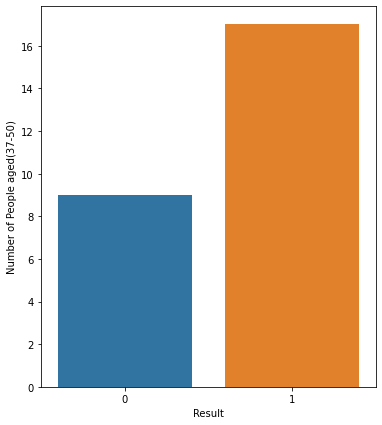

In [61]:
plt.figure(figsize=(6,7))
ax = sns.barplot(x='Target',y='Age',data=df_age_37_50)
ax.set(xlabel='Result',ylabel='Number of People aged(37-50)')

In [62]:
# People of age group 50-71 have heart disease

df_age_50_71 = pd.concat([df[(df['Age']>=50) & (df['Age']<71)][['Age','Target']].groupby(by='Target',axis=0).count()])
df_age_50_71.reset_index(inplace=True)
df_age_50_71

,Target,Age
0,0,41
1,1,32


[Text(0.5, 0, 'Result'), Text(0, 0.5, 'Number of People aged(50-71)')]

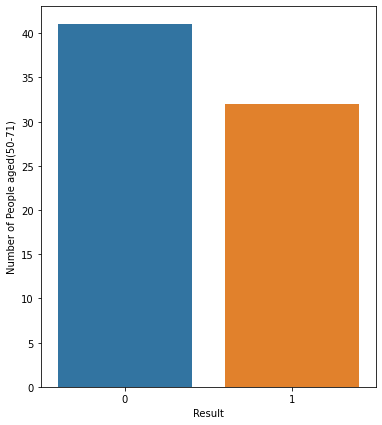

In [63]:
plt.figure(figsize=(6,7))
ax = sns.barplot(x='Target',y='Age',data=df_age_50_71)
ax.set(xlabel='Result',ylabel='Number of People aged(50-71)')

In [64]:
# High blood pressure at rest corresponds to a heart disease?

df_hbp =pd.concat([df[(df['Resting Blood Pressure']>140)][['Resting Blood Pressure','Target']].groupby(by='Target',axis=0).count()])
df_hbp.reset_index(inplace=True)
df_hbp


,Target,Resting Blood Pressure
0,0,12
1,1,13


[Text(0.5, 0, 'Result(Resting Blood Pressure>140)'),
 Text(0, 0.5, 'Number of People')]

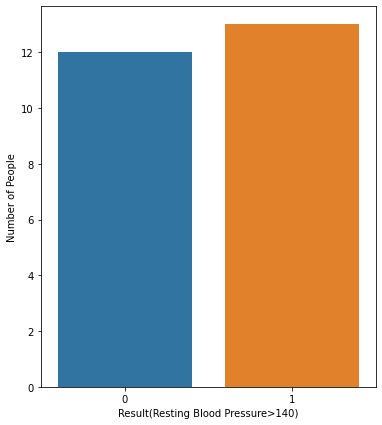

In [65]:
plt.figure(figsize=(6,7))
ax = sns.barplot(x='Target',y='Resting Blood Pressure',data=df_hbp)
ax.set(xlabel='Result(Resting Blood Pressure>140)',ylabel='Number of People')

We know that if the cholesterol limit is greater than 240 thaen it is called High cholesterol.

In [66]:
df.head()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholestoral,Target
0,63,1,3,145,233,1
1,37,1,2,130,250,1
2,41,0,1,130,204,1
3,56,1,1,120,236,1
4,57,0,0,120,354,1


In [67]:
#high blood pressure corresponds to high cholestoral

df_hc =pd.concat([df[(df['Resting Blood Pressure']>140)][['Resting Blood Pressure','Cholestoral']]])
df_hc.reset_index(inplace=True)
df_hc.head()

,index,Resting Blood Pressure,Cholestoral
0,0,145,233
1,8,172,199
2,9,150,168
3,14,150,283
4,17,150,226


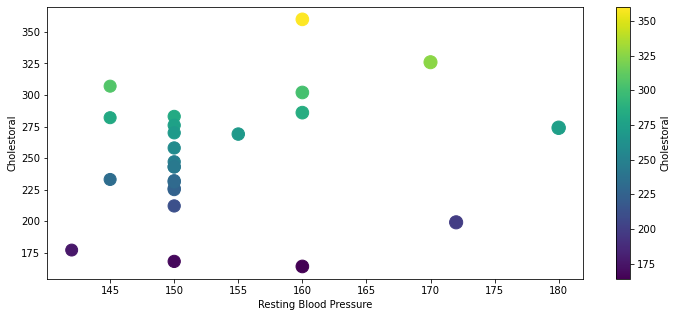

In [68]:
ax = df_hc.plot.scatter('Resting Blood Pressure','Cholestoral',c='Cholestoral',s=df_hc['Resting Blood Pressure']
                        ,colormap='viridis',sharex=False,figsize=(12,5))

# **4. Find the learning task (Supervised/Unsupervised) here (Regression or Classification or Clustering).**

This Dataset is a supervised learning dataset. Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs.\
\
This is also a Classification problem. The Target value is always 0 and 1. So this is a Binary Classification problem.\
\
The ultimate goal of this dataset is to answer whether a person has heart disease or not.
\
We can Predict the quantities for some unseen independent variable. Here I'm going to use logistic regression for this process.


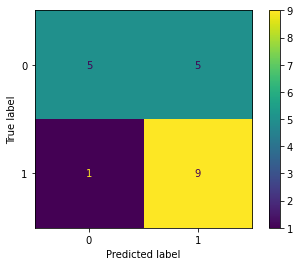

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
y = df['Target'].values
X = df.drop(['Target'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=0)

classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(classifier, x_test,y_test)

The Accuracy of our classifier

In [70]:
accuracy_score(y_test,y_pred)

0.7

For some unseen data we can also predict the result

In [71]:
test = np.array([56,1,2,135,220])
test = np.reshape(test,(1,5))
print(classifier.predict(test))

[1]


# **5. Calculate and Explain the statistics (mean,median,mode, range,variance,standard deviation etc.) of each feature.**

The Mean, Median, and Mode are the central tendencies of data. A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data.

In [72]:
#Now we are only working with Quantitative variable
df_qnt = df[['Age','Resting Blood Pressure','Cholestoral']]
df_qnt.head()

,Age,Resting Blood Pressure,Cholestoral
0,63,145,233
1,37,130,250
2,41,130,204
3,56,120,236
4,57,120,354


**Mean:** It is the average of a set of numerical values.

In [73]:
df_qnt.mean()

Age                        54.70
Resting Blood Pressure    133.38
Cholestoral               246.63
dtype: float64

The average Age is 54.74 Resting Blood Pressure is 133.38 and Cholestoral is 246.63

**Median:** The median is the middle number in a sorted, ascending or descending, list of numbers and can be more descriptive of that data set than the average.

In [74]:
df_qnt.median()

Age                        56.0
Resting Blood Pressure    130.0
Cholestoral               239.0
dtype: float64

The Median of Age is 56 , Cholestoral is 239 and Resting Blood Pressure is 130

**Mode:**The mode is the value that appears most frequently in a data set. A set of data may have one mode, more than one mode, or no mode at all.

In [75]:
df_qnt.mode()

,Age,Resting Blood Pressure,Cholestoral
0,58,130,177.0
1,60,140,NaN


The mode of Age is 58 and 60 as both of them are counted same time,Similarly Resting Blood Pressure is 130 and 140 and cholestoral is 177 which occurs most times.

**Range:**The difference between the lowest and highest values

In [76]:
df_qnt.max()-df_qnt.min()

Age                        34
Resting Blood Pressure     76
Cholestoral               253
dtype: int64

The range of Age is 34 which is from 37-71.Resting Blood Pressure is 76 which is from 104-180 and Cholestoral is   whic is from 164 - 417.

**Variance:**The term variance refers to a statistical measurement of the spread between numbers in a data set. More specifically, variance measures how far each number in the set is from the mean and thus from every other number in the set.

In [77]:
df_qnt.var()

Age                         65.505051
Resting Blood Pressure     240.056162
Cholestoral               2373.588990
dtype: float64

The variance of age is 65.51, Resting Blood Pressure is 240.057 and Cholestoral is 2373.589.

**Standard Deviation:**standard deviation is a measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean (also called the expected value) of the set, while a high standard deviation indicates that the values are spread out over a wider range.

In [78]:
df_qnt.std()

Age                        8.093519
Resting Blood Pressure    15.493746
Cholestoral               48.719493
dtype: float64

We can get a real view of the dispersion of data when we look into the standard deviation. Here The standard deviation of Age is 8.1. It means the data aren't very dispersed and Age data tend to close to the mean. Resting Blood Pressure's standard deviation is also close to the mean. But The Cholesterol data is very spread out over the range. And the standard deviation is very high.

# **6. Draw appropriate figures (histogram/bar diagram/pie chart/box plot/scatter plot/ time series etc.) using the features (or sub group of data) and explain the properties of these plots.**

# **7. Analyze these figures and comment on the distribution, composition, range of values,correlation with target etc. of the data.e.g. What can we tell about the data seeing the plots?**


**Histogram :**

F:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  wa

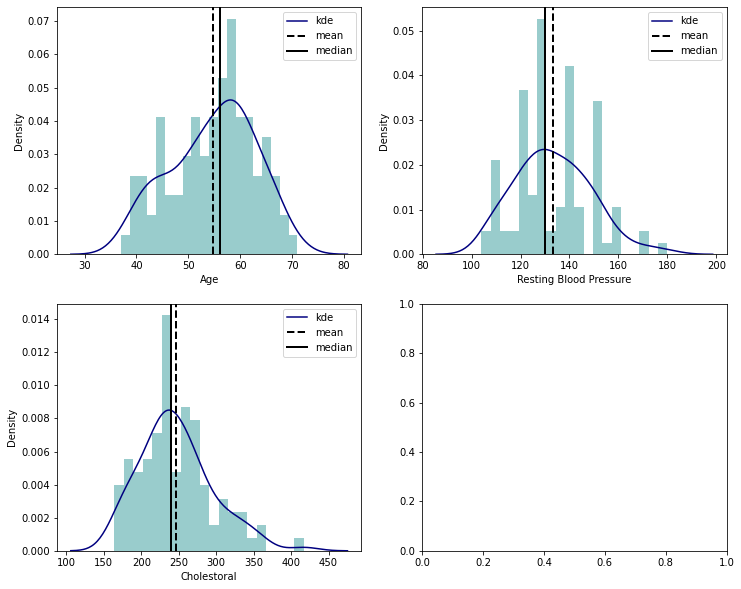

In [79]:

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex=False,sharey=False, figsize=(12,10))

sns.distplot(df['Age'], hist_kws={'color':'Teal'},kde_kws={'color':'Navy'},ax=ax1,bins=20);
ax1.axvline(df['Age'].mean(), color='Black', linestyle='dashed', linewidth=2)
ax1.axvline(df['Age'].median(), color='Black', linestyle='-', linewidth=2)
ax1.legend(['kde','mean','median'])

sns.distplot(df['Resting Blood Pressure'], hist_kws={'color':'Teal'},kde_kws={'color':'Navy'},ax=ax2,bins=20);
ax2.axvline(df['Resting Blood Pressure'].mean(), color='Black', linestyle='dashed', linewidth=2)
ax2.axvline(df['Resting Blood Pressure'].median(), color='Black', linestyle='-', linewidth=2)
ax2.legend(['kde','mean','median'])

sns.distplot(df['Cholestoral'], hist_kws={'color':'Teal'},kde_kws={'color':'Navy'},bins=20,ax=ax3);
ax3.axvline(df['Cholestoral'].mean(), color='Black', linestyle='dashed', linewidth=2)
ax3.axvline(df['Cholestoral'].median(), color='Black', linestyle='-', linewidth=2)
ax3.legend(['kde','mean','median'])

A histogram is an approximate representation of the distribution of numerical data. It gives a rough sense of the density of the underlying distribution of the data, and often for density estimation: estimating the probability density function of the underlying variable.\
\
For the first histogram, the distribution is left-skewed as the mean < median. For the second one, the distribution is right-skewed as the median > mean. And the last one distribution is also right-skewed as median > mean.\
\
For the first Age distribution histogram, the data are mostly distributed in the 45-65 range. For the second one Resting Blood Pressure histogram, the data are mostly distributed in the 120-145 range. And for the last one, the density of data is higher in the 170-280 range.

**Box Plot :**

Text(0, 0.5, 'Resting Blood Pressure')

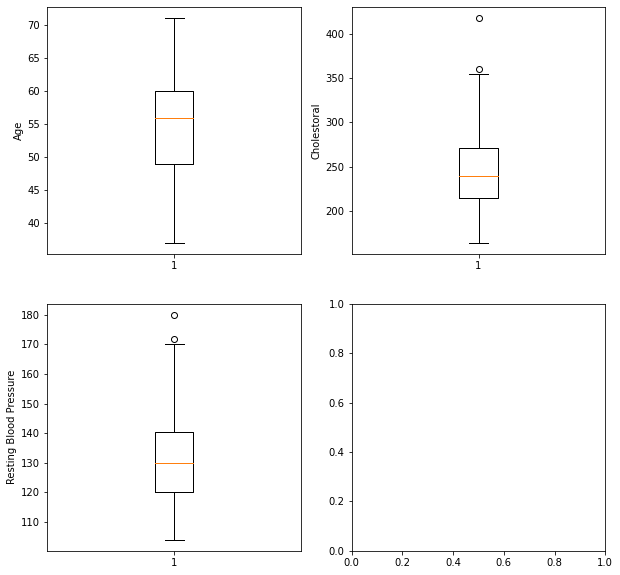

In [80]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex=False,sharey=False)
fig.set_size_inches(10,10)
ax1.boxplot(df['Age'],whis=1.5)
ax1.set_ylabel("Age")
ax2.boxplot(df['Cholestoral'],whis=1.5)
ax2.set_ylabel("Cholestoral")
ax3.boxplot(df['Resting Blood Pressure'],whis=1.5)
ax3.set_ylabel("Resting Blood Pressure")


A box and whisker plot—also called a box plot—displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum. In a box plot, we draw a box from the first quartile to the third quartile. A vertical line goes through the box at the median.\
\
For Age data, the median is 57. Q1 is 49 and Q3 is 58. For whisker 1.5 there are no outlier values.\
For the Cholesterol data, the median is about 240. Q1 is 220 and Q3 is 280. For whisker 1.5 there are two outlier values.\
For the Resting Blood Pressure data, the median is 130.Q1 is 120 and Q2 is 240. For Whisker 1.5 there are two outlier values.

**Scatter Plot :**

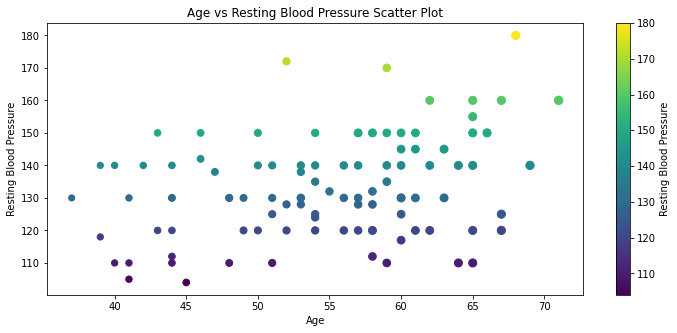

In [81]:
ax = df.plot.scatter('Age','Resting Blood Pressure',c='Resting Blood Pressure', s= df['Age'],colormap='viridis',sharex=False, figsize=(12,5));
ax.set(xlabel="Age")
ax.set_title("Age vs Resting Blood Pressure Scatter Plot");

This scatter plot shows changes in Resting Blood Pressure according to people's age. It is noticed that when Age increases the possibility of increasing Blood pressure is high. For the 37-50 age range, there is no patient having blood pressure of more than 150. But in the range above 50, there are multiple patients having blood pressure more than 150.

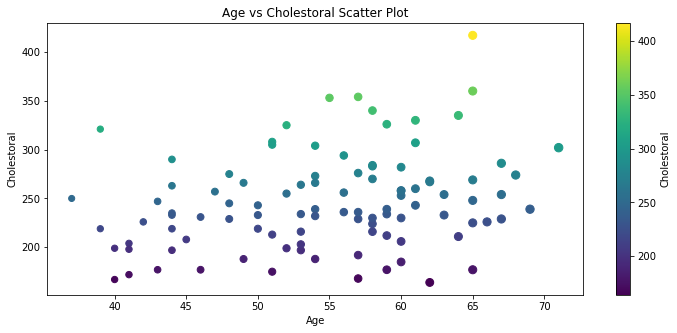

In [82]:
ax = df.plot.scatter('Age','Cholestoral',c='Cholestoral', s= df['Age'],colormap='viridis',sharex=False, figsize=(12,5));
ax.set(xlabel="Age")
ax.set_title("Age vs Cholestoral Scatter Plot");

For the Age vs Cholesterol scatter plot there is also an increasing trend in cholesterol when age increases. For 37-55 age, the maximum cholesterol limit is 325 but for greater than 55 range there are multiple patients having cholesterol greater than 330 even some of them are in 370 range.

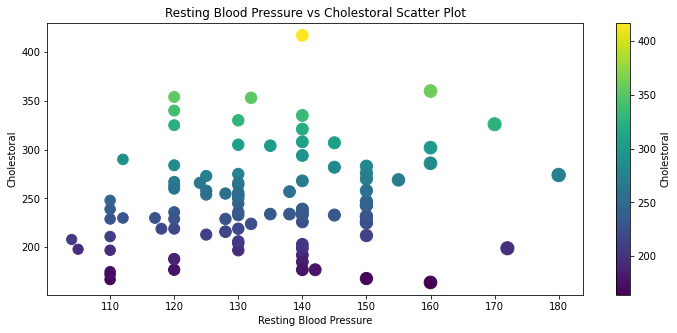

In [83]:
ax = df.plot.scatter('Resting Blood Pressure','Cholestoral',c='Cholestoral', s= df['Resting Blood Pressure'],colormap='viridis',sharex=False, figsize=(12,5));
ax.set(xlabel="Resting Blood Pressure")
ax.set_title("Resting Blood Pressure vs Cholestoral Scatter Plot");

For Resting Blood Pressure and Cholesterol scatter plot we can notice that those who have low resting blood pressure also have a low level of cholesterol. But when the rate of resting blood pressure increases the cholesterol rate also increases simultaneously.

**Bar Graph :**

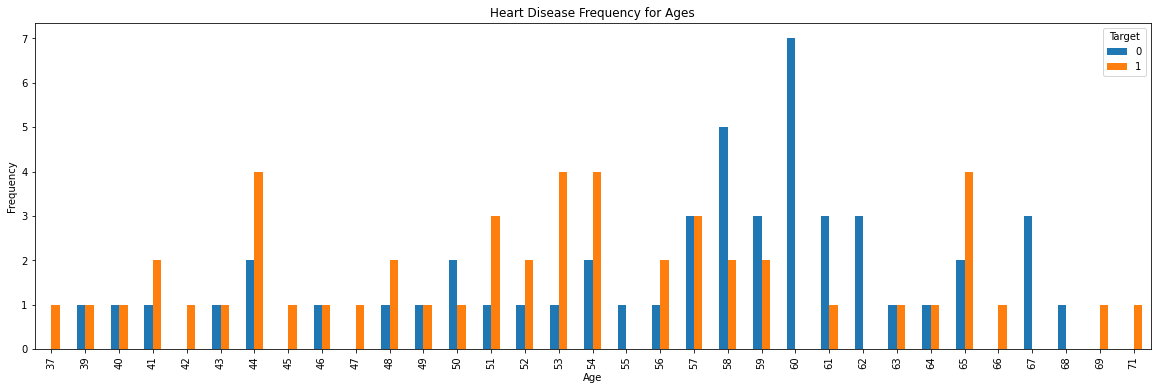

In [84]:
pd.crosstab(df.Age,df.Target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

From this bar graph, we can notice that for the age range 40-54 there is a comparatively higher heart disease case than the other portion of the bar graph. For age 57-68, there is a comparatively lower chance of heart disease.

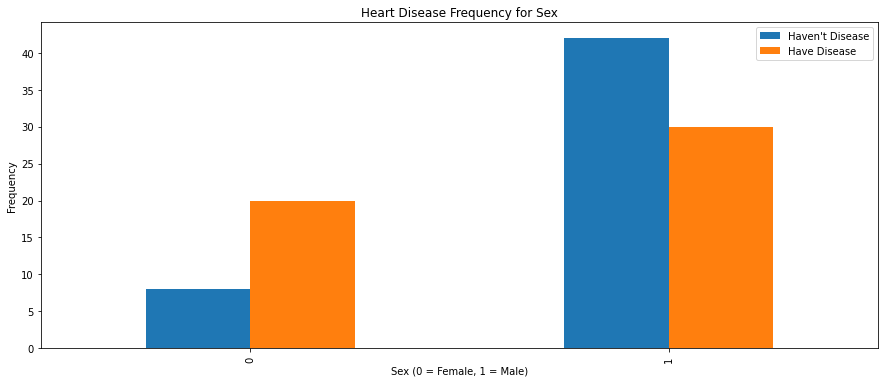

In [85]:
pd.crosstab(df.Sex,df.Target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

From this bar graph, we can notice that the number of Male patients is higher than Female patients. Though the ratio of female patients having disease compares to haven't diseased is higher than the Male patients.

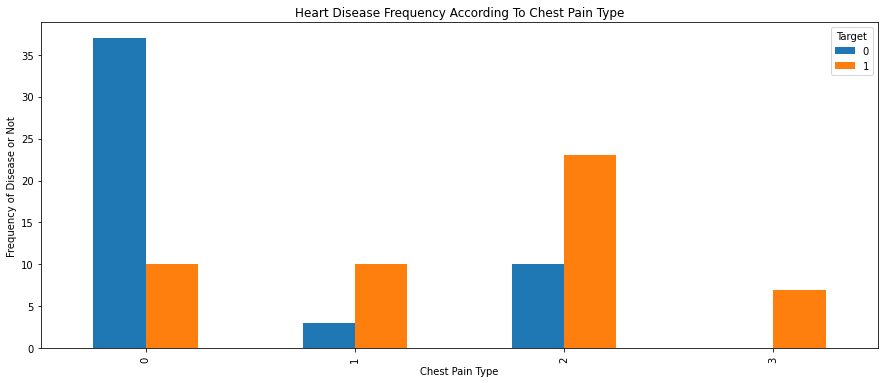

In [86]:
pd.crosstab(df['Chest Pain Type'],df.Target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency of Disease or Not')
plt.show()

This bar graph compares heart disease patients according to their Chest Pain Type. Those who have no chest pain have a very small probability of heart disease, Those who have Type 1 chest pain have a good chance of heart failure. Those who have type 2 chest pain have a high chance of heart disease. Those who have type 3 chest pain are all of them are heart disease patients.

# **8. Finally tell a story about the given dataset.**

The dataset I used in this EDA is called the heart_disease dataset. The total dataset has 100 instances. There are six features in this dataset called Age, Sex, Chest Pain Type, Resting Blood Pressure, Cholesterol, and Target. There is no missing value in this dataset. Here our feature variable of interest is Target. It refers to the presence of heart disease in the patient. Target value 1 stands for patients having heart disease and 0 refers to the absence of heart disease. Here 50 of our patients are suffering from heart disease whom 20 are Female and 30 are Male. Among 100 patients 47 have no chest pain, 13 have chest pain type 1,33 have chest pain type 2 and 7 have chest pain type 3.There is a high probability of heart disease people age ranging from 40-54. The people suffering from heart disease have relatively higher heart rates and cholesterol level is also high. For most of the patients, Chest pain and Cholesterol also increases according to age. Those who have high Blood Pressure and High cholesterol have a greater number of chest pain. All the patients having type 3 chest pain also have heart disease. The standard deviation of Cholesterol is very high and data is spread out over a large range.